<a href="https://colab.research.google.com/github/AdityaKalkeri/Evaluation_Projects/blob/main/Project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Skyserver.csv to Skyserver.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Skyserver.csv']))
df.head()

objid          ra       dec  ...  plate    mjd  fiberid
0  1.237650e+18  183.531326  0.089693  ...   3306  54922      491
1  1.237650e+18  183.598371  0.135285  ...    323  51615      541
2  1.237650e+18  183.680207  0.126185  ...    287  52023      513
3  1.237650e+18  183.870529  0.049911  ...   3306  54922      510
4  1.237650e+18  183.883288  0.102557  ...   3306  54922      512

[5 rows x 18 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())

objid
[1.23765e+18]
ra
[183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]
dec
[ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]
u
[19.47406 18.6628  19.38298 ... 18.75818 18.88287 19.27586]
g
[17.0424  17.21449 18.19169 ... 17.77784 17.91068 17.37829]
r
[15.94699 16.67637 17.47428 ... 17.51872 17.53152 16.30542]
i
[15.50342 16.48922 17.08732 ... 17.43302 17.36284 15.83548]
z
[15.22531 16.3915  16.80125 ... 17.42048 17.13988 15.50588]
run
[ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
rerun
[301]
camcol
[4 2 1 5 6 3]
field
[267 268 269 270 271 272 273 274 275 276 277 278 279 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 502 503
 504 505 506 508 509 510 511 512 515 516 517 518 519 520 521 522 104 105
 110 111 112 113 114 115 116  25  26  28  29  90  91  92  93  95  74  70
  71  66 103 538 539 567 568 571 573 575 576 579 580

Therefore only 2 columns are categorical: camcol and class

camcol has 6 values

class has 3 values and is the target column: Star, Galaxy, Quasar(QSO)

    Star: A star is an astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.

    Galaxy: A galaxy is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. We are in the Milky Way Galaxy

    Quasar: A quasar (Quasi-stellar object, abbreviated QSO) is an extremely luminous active galactic nucleus (AGN), in which a supermassive black hole with mass ranging from millions to billions of times the mass of the Sun is surrounded by a gaseous accretion disk.

The rest of the features are Numerical with a mix of Discrete and Continous numerical variables.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


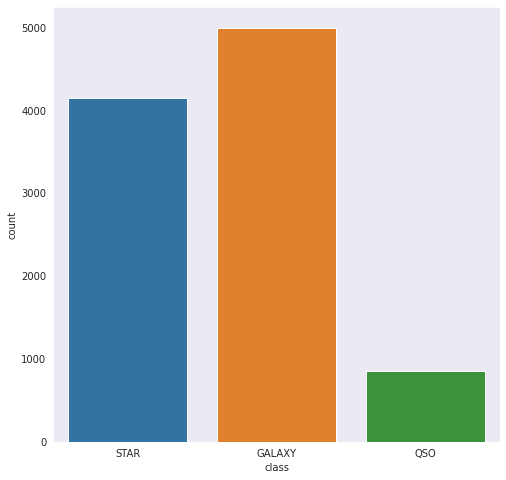

In [9]:
#Lets see class division
plt.figure().set_size_inches(8,8)
sns.countplot(df['class'])

Fairly good representation of Star and Galaxy class. QSO seems to be low in number. Lets see if our model trains well to that class.

In [10]:
df.groupby(['class', 'rerun'])['rerun'].unique()

class   rerun
GALAXY  301      [301]
QSO     301      [301]
STAR    301      [301]
Name: rerun, dtype: object

In [11]:
df.groupby(['class', 'objid'])['objid'].unique()

class   objid       
GALAXY  1.237650e+18    [1.23765e+18]
QSO     1.237650e+18    [1.23765e+18]
STAR    1.237650e+18    [1.23765e+18]
Name: objid, dtype: object

We will drop two columns: rerun and objid, which seem to have only one value, so wont help in distinguishing between classes

In [12]:
df.drop(['objid', 'rerun'], axis = 1, inplace = True)

In [13]:
num = df.drop('camcol', axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b9481ba90>,
      dtype=object)

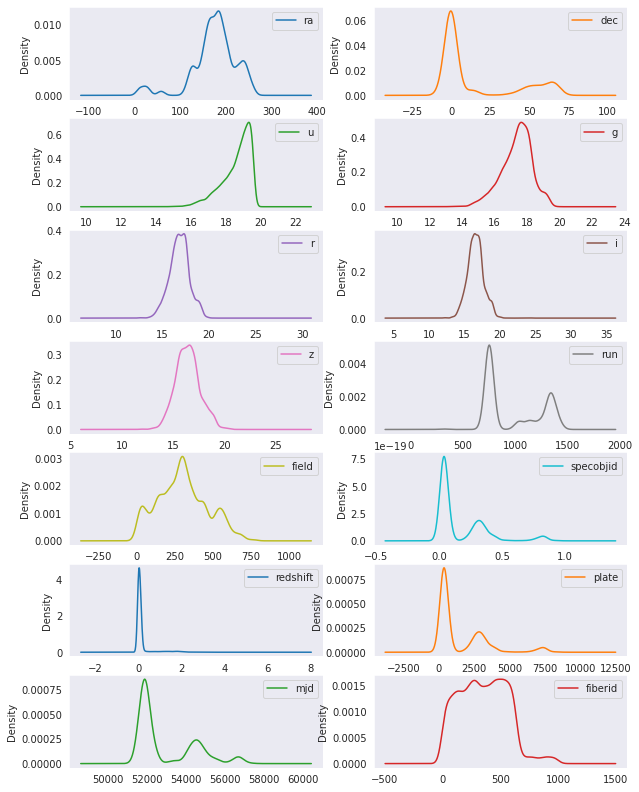

In [14]:
num.plot(kind = 'kde', subplots = True, sharex = False, layout = (7,2), figsize = (10,14))

Most of the Distributions are Gaussians. A fair amount of noise is present in the features.

Feature Scaling and Normalization is required.

<Figure size 864x864 with 0 Axes>

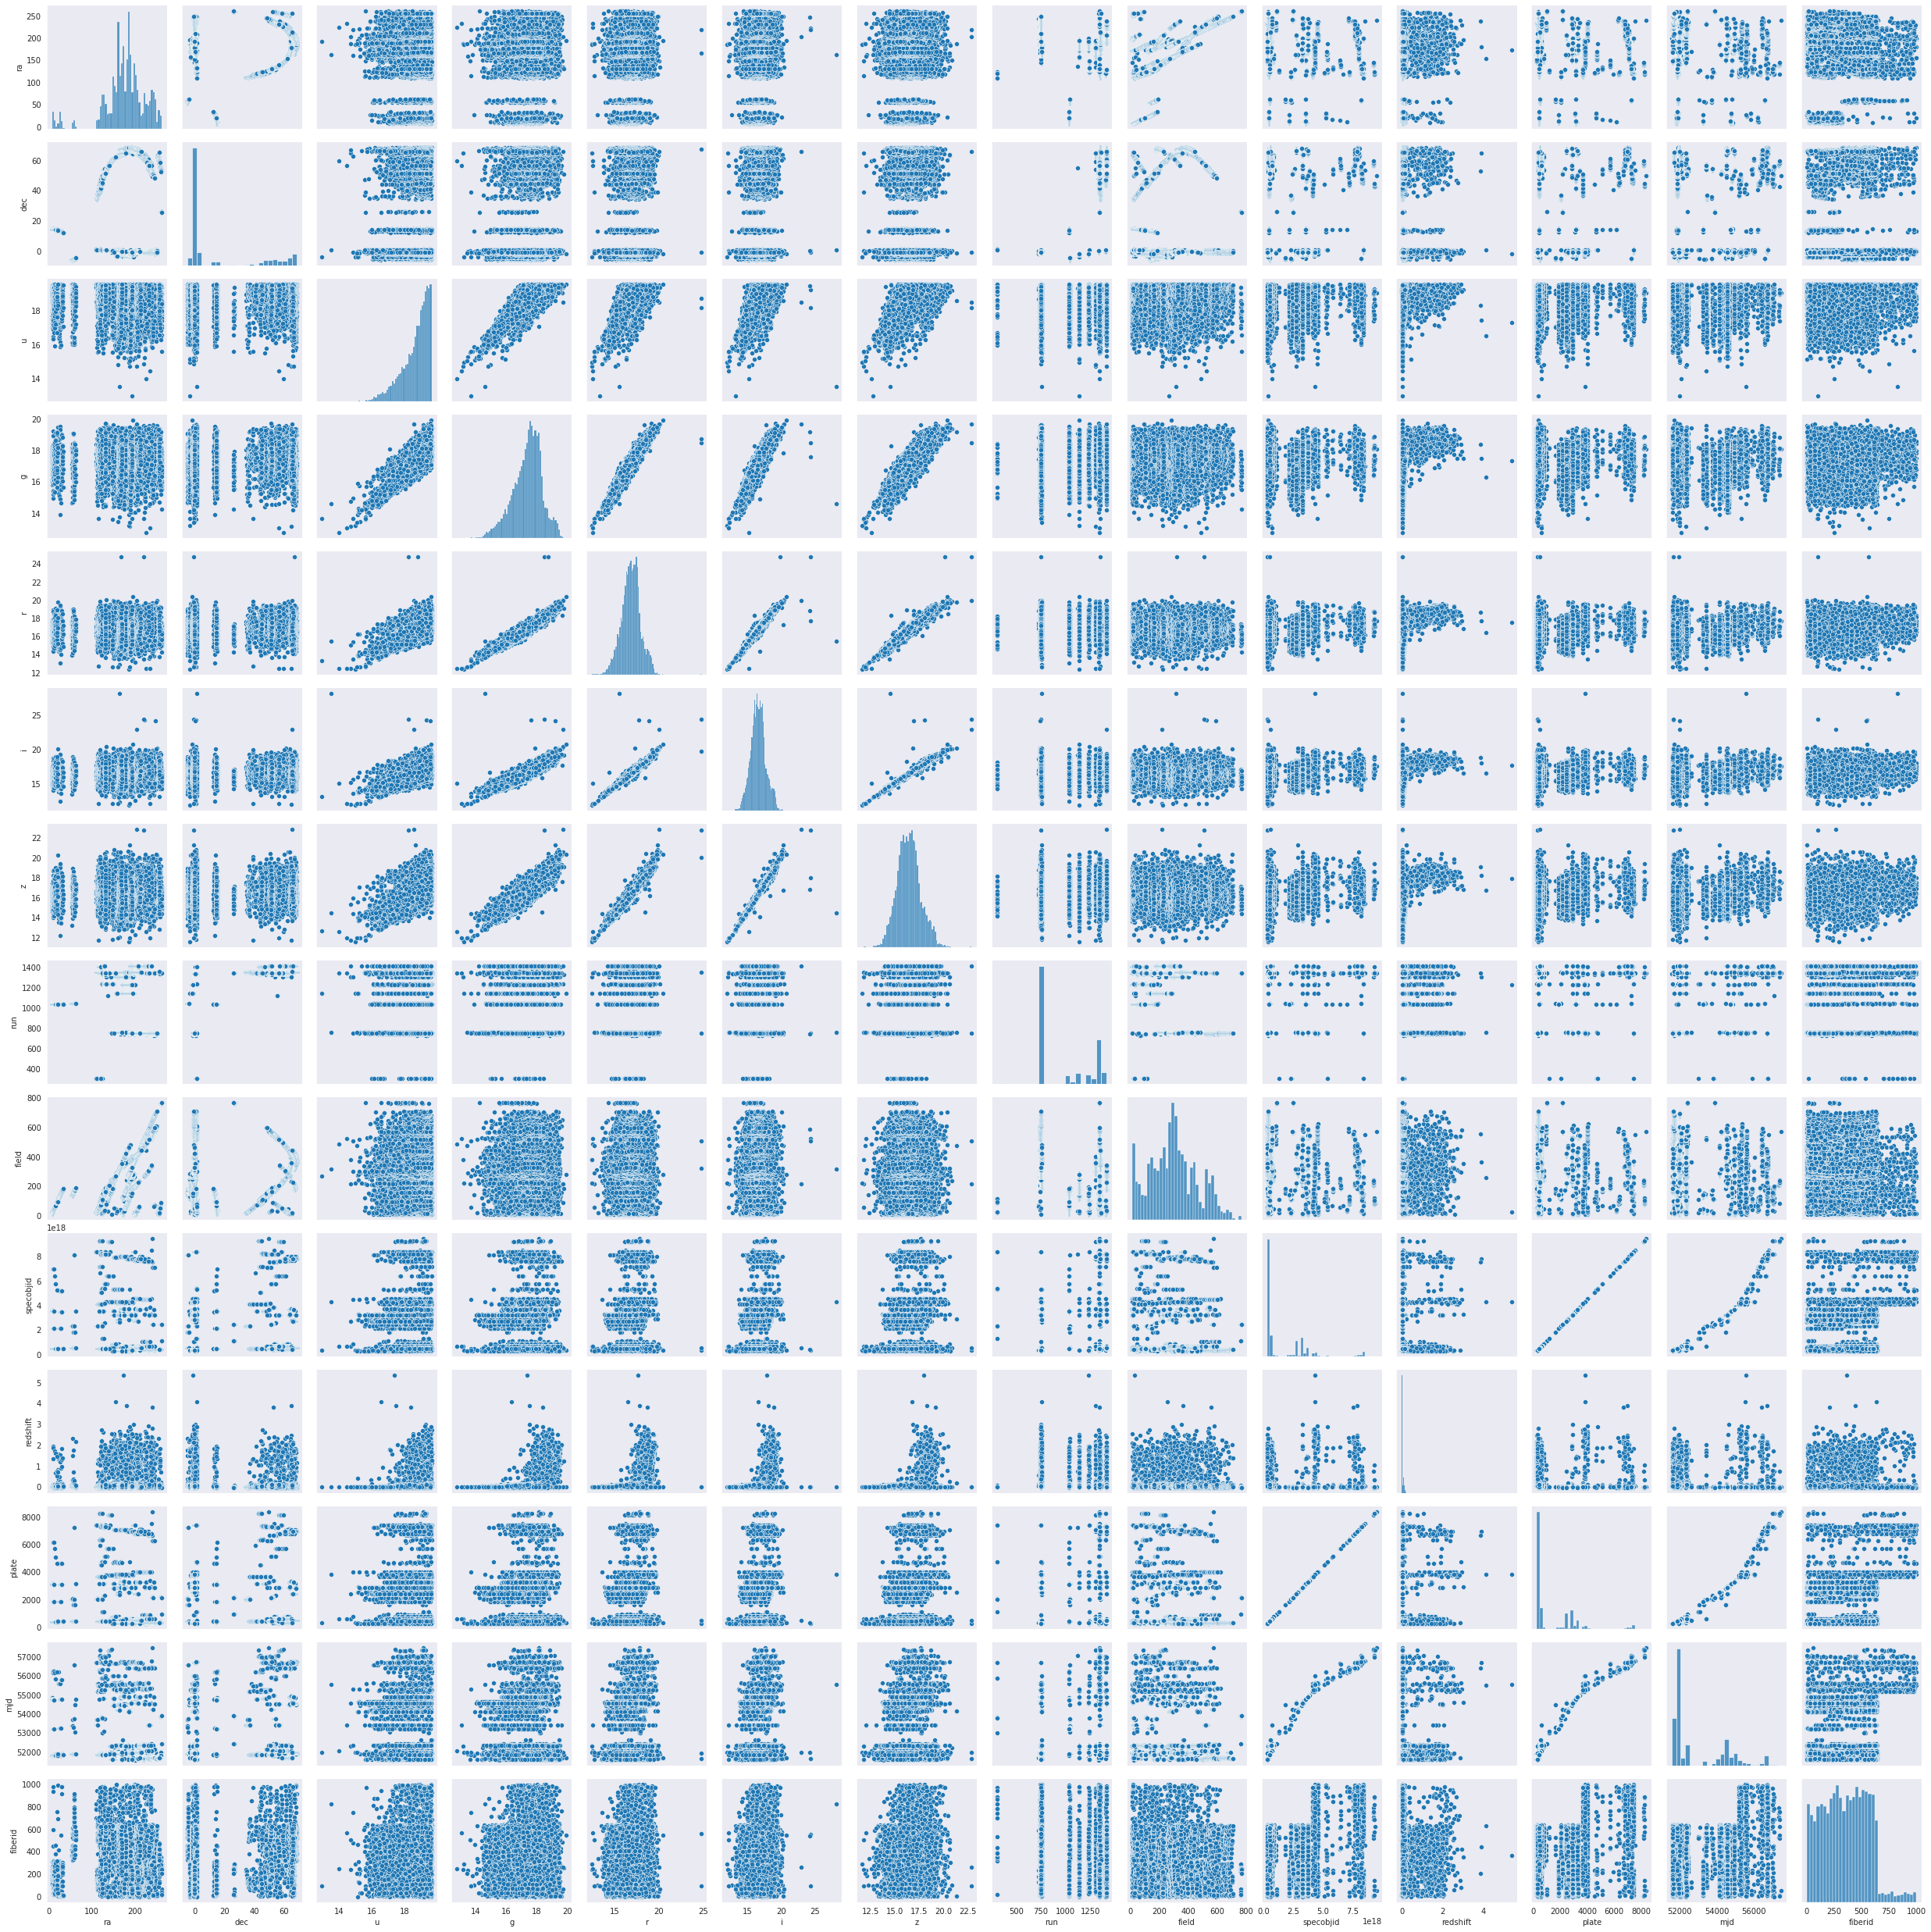

In [15]:
plt.figure().set_size_inches(12,12)
sns.pairplot(data = num)

We have a few correlated variables, lets see more clearly with Correlation heatmap

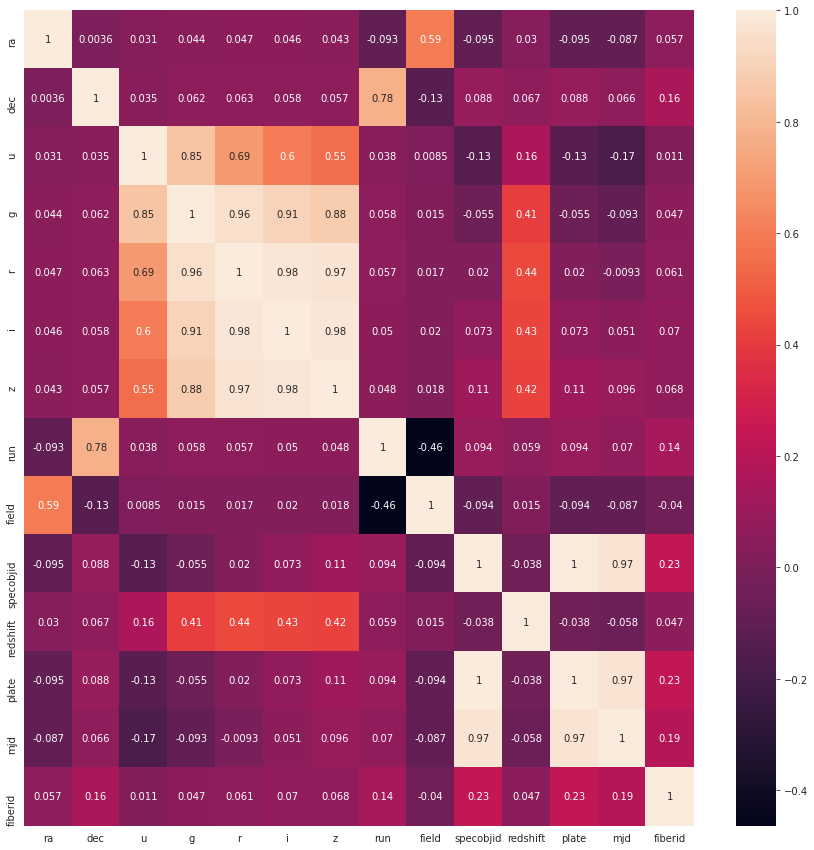

In [16]:
plt.figure().set_size_inches(15,15)
sns.heatmap(num.corr(), annot = True)

We have features which are highly correlated with each other, so maybe PCA will help reduce the no of dimensions.

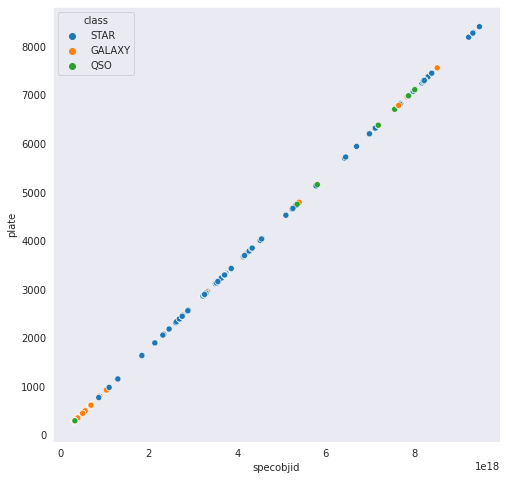

In [17]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(x = 'specobjid', y = 'plate', hue = 'class', data = df)

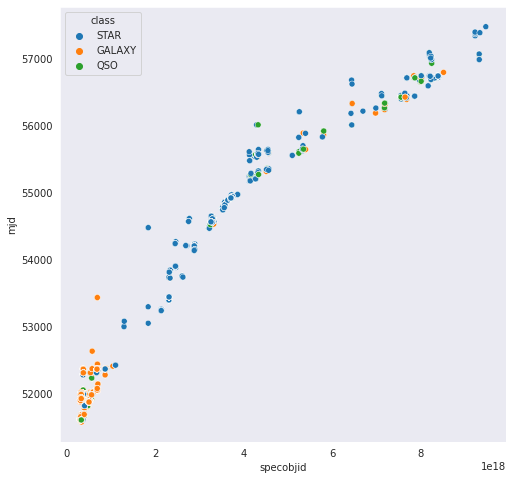

In [18]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(x = 'specobjid', y = 'mjd', hue = 'class', data = df)

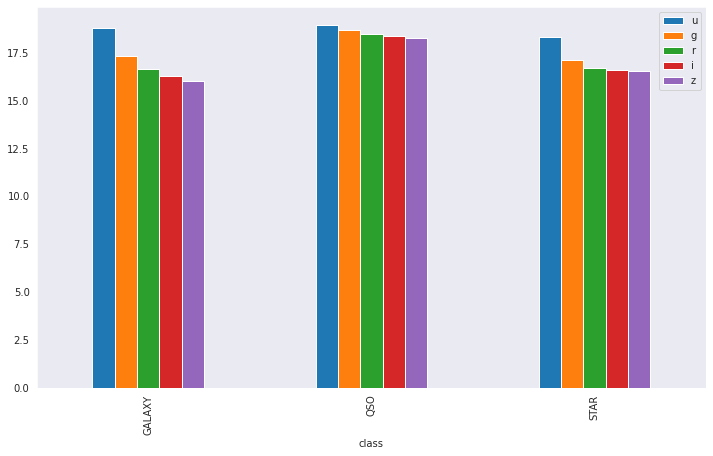

In [19]:
df.groupby('class')[['u','g','r','i','z']].mean().plot(kind = 'bar', figsize = (12,7))

So all the features are almost equally distributed, but in galaxy and star, the  difference of mean of 'u' and the mean of other columns is more prominent.

Text(0.5, 1.0, 'Pairplot')

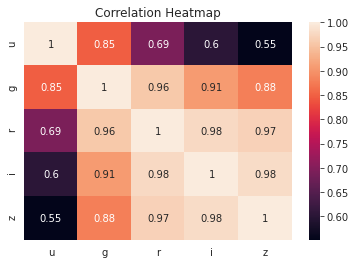

<Figure size 432x288 with 0 Axes>

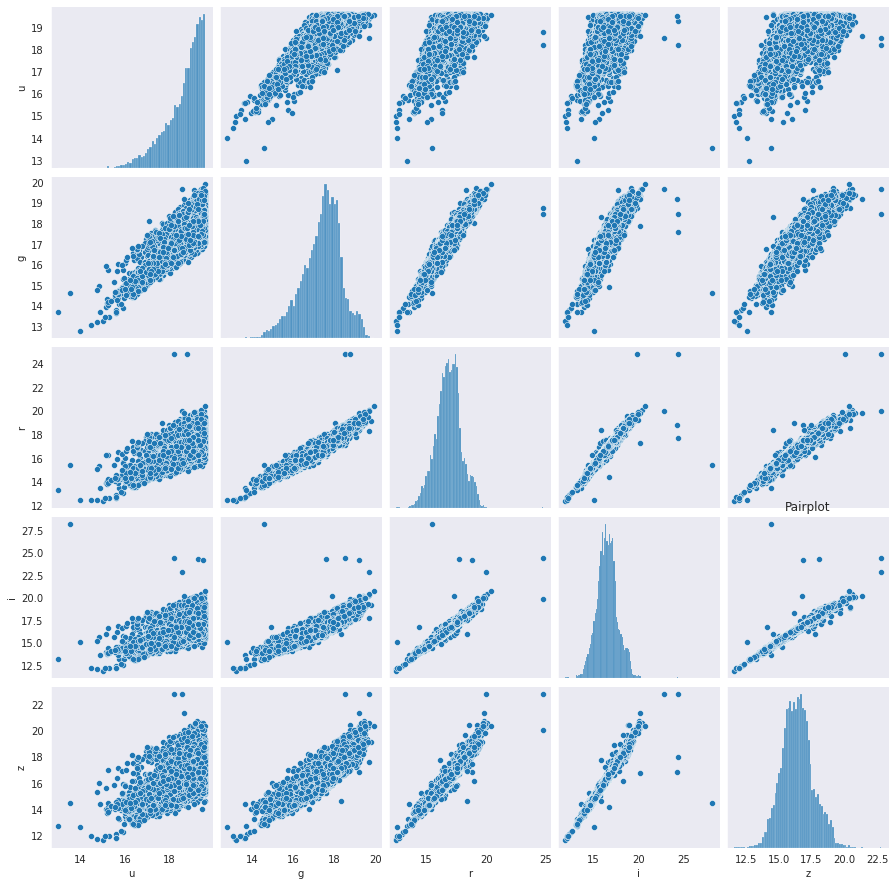

In [20]:
plt.figure()
sns.heatmap(df[['u','g','r','i','z']].corr(), annot = True)
plt.title("Correlation Heatmap")
plt.figure()
sns.pairplot(df[['u','g','r','i','z']])
plt.title("Pairplot")

These features are highly correlated with each other.

All the distributions except u are normal. U is left skewed.

In [21]:
df.groupby('class')[['ra', 'dec']].agg([np.mean, np.std])

ra                   dec           
              mean        std       mean        std
class                                              
GALAXY  177.333570  46.777154  15.764372  25.685596
QSO     177.468000  47.101029  20.570639  27.932922
STAR    172.962158  48.998648  12.544824  23.756274

While 'ra' can be used to distinguish between Galaxy and Quasar Vs Star, 'dec' is pretty clear in distinguishing all the groups. There is lot of deviations in the values

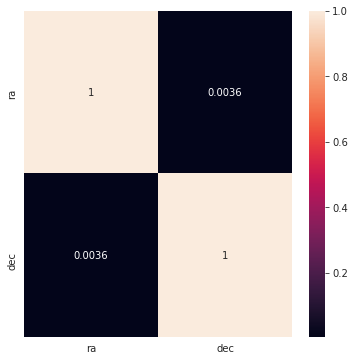

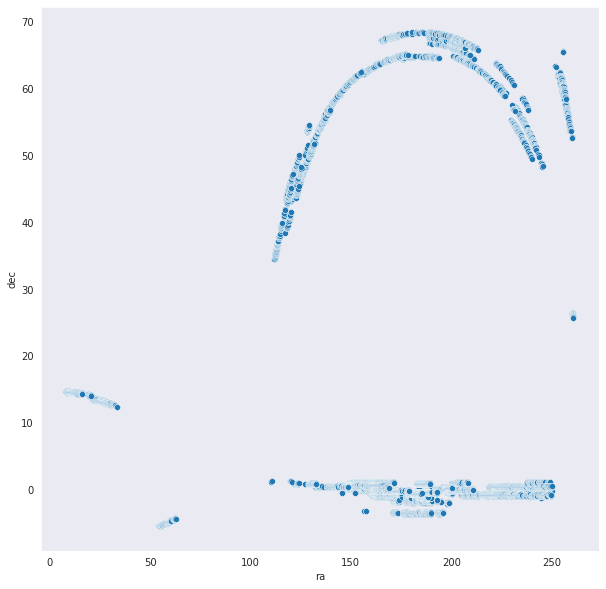

In [22]:
plt.figure().set_size_inches(6,6)
sns.heatmap(df[['ra', 'dec']].corr(), annot = True)
plt.figure().set_size_inches(10,10)
sns.scatterplot(x = 'ra', y = 'dec', data = df, palette = 'dark')

The features are independant of each other. No linear relation.

In [23]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [24]:
df[['run', 'field']]

run  field
0      752    267
1      752    267
2      752    268
3      752    269
4      752    269
...    ...    ...
9995  1345    161
9996  1345    162
9997  1345    162
9998  1345    163
9999  1345    163

[10000 rows x 2 columns]

In [25]:
df.groupby('class')[['run', 'field']].agg([np.mean, np.std])

run                   field            
               mean         std        mean         std
class                                                  
GALAXY   996.711685  273.808945  300.963585  165.836017
QSO     1036.120000  279.092636  304.983529  162.016001
STAR     950.886561  268.178008  303.552264  158.708037

'run' is good at distinguishing class, but has high std dev.

'field' doesn't distinguish well between the classes.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


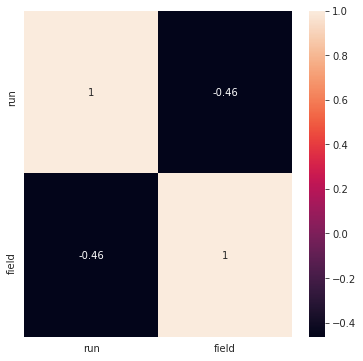

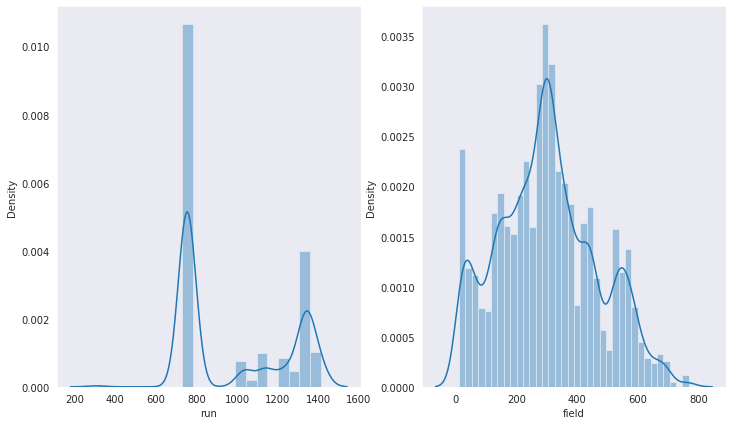

In [26]:
plt.figure().set_size_inches(6,6)
sns.heatmap(df[['run', 'field']].corr(), annot = True)
plt.figure().set_size_inches(12,7)
plt.subplot(1,2,1)
sns.distplot(df['run'])
plt.subplot(1,2,2)
sns.distplot(df['field'])

Both are negatively correlated with each other.

In [27]:
df.groupby('class')['specobjid'].agg([np.mean, np.std]).sort_values(by = 'mean', ascending = False)

mean           std
class                             
STAR    3.018202e+18  2.132595e+18
QSO     1.447231e+18  2.278053e+18
GALAXY  5.379141e+17  8.107982e+17

The specobjid feature is good at distinguishing classes, but the Standard deviation is still high.

But we can easily say for specobjid: STAR > QSO > GALAXY

In [28]:
df.groupby('class')['redshift'].agg([np.mean, np.std]).sort_values(by = 'mean', ascending = False)

mean       std
class                     
QSO     1.218366  0.697699
GALAXY  0.080325  0.046036
STAR    0.000043  0.000410

Redshift is a great class diffrentiator, as QSO >> GALAXY >> STAR.

In [29]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [30]:
df.groupby('class')['plate'].agg([np.mean,np.std])

mean          std
class                           
GALAXY   477.680672   720.126177
QSO     1285.305882  2023.299687
STAR    2680.613198  1894.109205

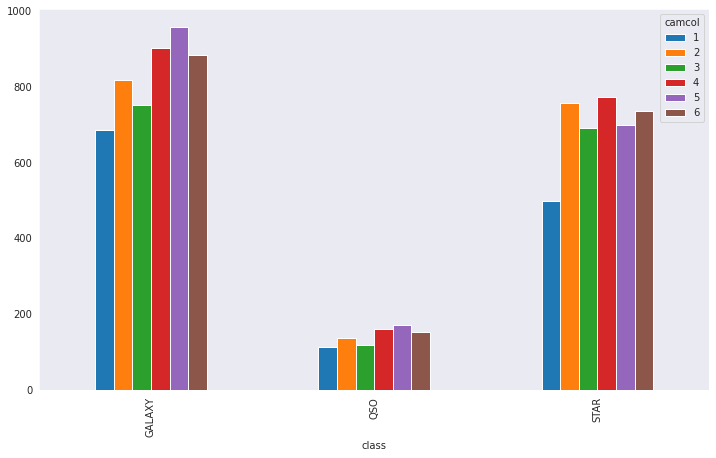

In [31]:
df.groupby(['class','camcol'])['camcol'].count().unstack().plot(kind = 'bar', figsize=(12,7))

All the columns are uniformly distributed

## Data Preprocessing

In [32]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

camcol is categorical data, so we will do one hot encoding on the column

on the rest of the numeric data, we will perform normalization, scaling and if required: PCA

In [33]:
cols = pd.get_dummies(df['camcol'], drop_first = True)
df = pd.concat([df,cols], axis = 1)
df.drop('camcol', axis = 1, inplace = True)

In [34]:
#Label Encoding
print(df['class'].unique())
map_dict = {'STAR': 1,
            'GALAXY': 2,
            'QSO' : 3}
df['class'] = df['class'].map(map_dict)
df['class'].unique()

['STAR' 'GALAXY' 'QSO']


array([1, 2, 3])

# Model Selection

In [35]:
X = df.drop('class', axis = 1)
y = df['class']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [38]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
dt = DecisionTreeClassifier().fit(X_train_sc, y_train)
y_train_pred = dt.predict(X_train_sc)
y_test_pred = dt.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))

Training accuracy = 1.0
Testing accuracy = 0.9844


We are getting great accuracy for decision tree classifier

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1059
           2       0.99      0.98      0.98      1247
           3       0.91      0.93      0.92       194

    accuracy                           0.98      2500
   macro avg       0.96      0.97      0.97      2500
weighted avg       0.98      0.98      0.98      2500



In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = dt,
                        X = X_train_sc,
                        y = y_train,
                        cv = 5,
                        n_jobs = -1)
print(scores)
print("mean = {}\n std_dev = {}".format(np.mean(scores), np.std(scores)))

[0.98533333 0.98066667 0.98733333 0.984      0.982     ]
mean = 0.9838666666666667
 std_dev = 0.0023626726862225568


So the classifier is stable and is giving good results

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train_sc, y_train)
y_train_pred = rf.predict(X_train_sc)
y_test_pred = rf.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))

Training accuracy = 0.9998666666666667
Testing accuracy = 0.9892


In [43]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1059
           2       0.99      0.99      0.99      1247
           3       0.96      0.95      0.96       194

    accuracy                           0.99      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



In [44]:
scores = cross_val_score(estimator = rf,
                        X = X_train_sc,
                        y = y_train,
                        cv = 5,
                        n_jobs = -1)
print(scores)
print("mean = {}\n std_dev = {}".format(np.mean(scores), np.std(scores)))

[0.988      0.98733333 0.99       0.992      0.98533333]
mean = 0.9885333333333334
 std_dev = 0.002286190426597649


Random Forest is classifying a bit better than DecisionTrees

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000).fit(X_train_sc, y_train)
y_train_pred = lr.predict(X_train_sc)
y_test_pred = lr.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))

Training accuracy = 0.9769333333333333
Testing accuracy = 0.9748


In [46]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98      1059
           2       0.99      0.97      0.98      1247
           3       0.96      0.95      0.96       194

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



In [47]:
scores = cross_val_score(estimator = lr,
                        X = X_train_sc,
                        y = y_train,
                        cv = 5,
                        n_jobs = -1)
print(scores)
print("mean = {}\n std_dev = {}".format(np.mean(scores), np.std(scores)))

[0.97733333 0.96733333 0.97466667 0.97666667 0.97466667]
mean = 0.9741333333333333
 std_dev = 0.003562770457569966


Logistic regression gives good results, but not as good as Decision Trees or Random Forest. later we will see if Hyperparameter tuning helps

In [48]:
from sklearn.neighbors import KNeighborsClassifier
max_acc = 0
k = 0
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_sc, y_train)
    y_pred = knn.predict(X_test_sc)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy>max_acc:
        max_acc = accuracy
        k = i
print("Max accuracy is {} for k = {}".format(max_acc, k))

Max accuracy is 0.8976 for k = 3


In [49]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train_sc, y_train)
y_train_pred = knn.predict(X_train_sc)
y_test_pred = knn.predict(X_test_sc)
print("Training accuracy = ", accuracy_score(y_train,y_train_pred))
print("Testing accuracy = ", accuracy_score(y_test, y_test_pred))

Training accuracy =  0.9430666666666667
Testing accuracy =  0.8976


In [50]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.90      0.87      0.88      1059
           2       0.88      0.93      0.91      1247
           3       0.98      0.87      0.92       194

    accuracy                           0.90      2500
   macro avg       0.92      0.89      0.90      2500
weighted avg       0.90      0.90      0.90      2500



In [51]:
scores = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = 3),
                        X = X_train_sc,
                        y = y_train,
                        cv = 5,
                        n_jobs = -1)
print(scores)
print("mean = {}\n std_dev = {}".format(np.mean(scores), np.std(scores)))

[0.90133333 0.88333333 0.90466667 0.886      0.884     ]
mean = 0.8918666666666667
 std_dev = 0.009193234227167026


In [52]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf').fit(X_train_sc, y_train)
y_train_pred = svc_rbf.predict(X_train_sc)
y_test_pred = svc_rbf.predict(X_test_sc)
print("Training Accurcacy: rbf = {}".format(accuracy_score(y_train,y_train_pred)))
print("Test Accurcacy: rbf = {}".format(accuracy_score(y_test,y_test_pred)))

svc_lin = SVC(kernel = 'linear').fit(X_train_sc,y_train)
y_train_pred = svc_lin.predict(X_train_sc)
y_test_pred = svc_lin.predict(X_test_sc)
print("Training Accurcacy: lin = {}".format(accuracy_score(y_train,y_train_pred)))
print("Test Accurcacy: lin = {}".format(accuracy_score(y_test,y_test_pred)))


Training Accurcacy: rbf = 0.9496
Test Accurcacy: rbf = 0.9364
Training Accurcacy: lin = 0.9838666666666667
Test Accurcacy: lin = 0.9852


In [53]:
#linear kernel
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1059
           2       1.00      0.98      0.99      1247
           3       0.97      0.97      0.97       194

    accuracy                           0.99      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



In [54]:
scores = cross_val_score(estimator =SVC(kernel = 'linear'),
                        X = X_train_sc,
                        y = y_train,
                        cv = 5,
                        n_jobs = -1)
print(scores)
print("mean = {}\n std_dev = {}".format(np.mean(scores), np.std(scores)))

[0.982      0.98266667 0.98266667 0.984      0.984     ]
mean = 0.9830666666666665
 std_dev = 0.0007999999999999933


So we are getting good results here too.

In [55]:
#Lets further study Decision Tree

In [56]:
dt.tree_.max_depth

15

Lets adjust the depth of the decision tree and test the accuracy

In [57]:
max_score = 0
max_dep = 0
for i in range(15):
    dt = DecisionTreeClassifier().fit(X_train_sc, y_train)
    y_train_pred = dt.predict(X_train_sc)
    y_test_pred = dt.predict(X_test_sc)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(i)
    print("Training accuracy = {}".format(train_acc))
    print("Testing accuracy = {}".format(test_acc))
    if test_acc>max_score:
        max_score = test_acc
        max_dep = i
print("Best score = {}, max_depth = {}".format(max_score, max_dep))

0
Training accuracy = 1.0
Testing accuracy = 0.982
1
Training accuracy = 1.0
Testing accuracy = 0.9828
2
Training accuracy = 1.0
Testing accuracy = 0.9836
3
Training accuracy = 1.0
Testing accuracy = 0.9832
4
Training accuracy = 1.0
Testing accuracy = 0.9852
5
Training accuracy = 1.0
Testing accuracy = 0.986
6
Training accuracy = 1.0
Testing accuracy = 0.9836
7
Training accuracy = 1.0
Testing accuracy = 0.9832
8
Training accuracy = 1.0
Testing accuracy = 0.9836
9
Training accuracy = 1.0
Testing accuracy = 0.9844
10
Training accuracy = 1.0
Testing accuracy = 0.984
11
Training accuracy = 1.0
Testing accuracy = 0.984
12
Training accuracy = 1.0
Testing accuracy = 0.9832
13
Training accuracy = 1.0
Testing accuracy = 0.986
14
Training accuracy = 1.0
Testing accuracy = 0.9828
Best score = 0.986, max_depth = 5


In [58]:
scores = cross_val_score(estimator =DecisionTreeClassifier(max_depth = 8),
                        X = X_train_sc,
                        y = y_train,
                        cv = 5,
                        n_jobs = -1)
print(scores)
print("mean = {}\n std_dev = {}".format(np.mean(scores), np.std(scores)))

[0.98866667 0.986      0.99       0.98733333 0.986     ]
mean = 0.9876000000000001
 std_dev = 0.001554920505292088


In [59]:

rf_tune = RandomForestClassifier(n_estimators = 1000).fit(X_train_sc, y_train)
y_train_pred = rf_tune.predict(X_train_sc)
y_test_pred = rf_tune.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))

Training accuracy = 1.0
Testing accuracy = 0.9892


So Looking at the models, Tree based algorithms are giving very good results. So For classifying Star, galaxy or quasor, we will choose Decision Tree classifier with max_depth = 8, as it is faster than ensemble method Random Forest and there is no compromise in the accuracy.

The only preprocessing need is converting categorical feature 'camcol' into dummy columns, applying sklearn's StandardScaler to the data, and Passing it to the Decision Tree Model

# Saving the Model

In [60]:
import pickle
model = DecisionTreeClassifier().fit(X_train_sc, y_train)
filename = 'Skyserver.sav'
pickle.dump(model, open(filename, 'wb'))